In [3]:
from scipy.optimize import minimize, NonlinearConstraint
import numpy as np 
import matplotlib.pyplot as plt


In [4]:
import numpy as np
from itertools import permutations

def permanent(matrix):
    n = len(matrix)
    perm_sum = 0

    for perm in permutations(range(n)):
        product = 1
        for i in range(n):
            product *= matrix[i, perm[i]]
        perm_sum += product

    return perm_sum

In [5]:
def idxs_delete(bitstring):

    idx_to_delete = []
    for i,bit in enumerate(bitstring):
        if int(bit) == 0:
            idx_to_delete.append(i)
            
    return np.array(idx_to_delete)

In [6]:
def drop_columns_and_rows(matrix, input_state):
    
    # Convert binary string to a list of integers
    indices_to_drop = idxs_delete(input_state)

    # Drop the specified columns and rows
    if indices_to_drop.size == 0:
        return matrix
    else:
        new_matrix = np.delete(matrix, indices_to_drop, axis=0)
        new_matrix = np.delete(new_matrix, indices_to_drop, axis=1)
        return new_matrix

In [7]:
def generate_input_states(inp_length):
    try:
        input_states = [format(i, f'0{inp_length}b') for i in range(2**inp_length)]
    except:
        input_states = []
        print('Error')
        
    return input_states

In [8]:
def return_permanents(matrix):
    
    input_states = generate_input_states(int(len(matrix)/2))
    perm_list = []
    
    for inp_state in input_states:
        perm_list.append(permanent(drop_columns_and_rows(matrix, inp_state)))
        
    return np.array(perm_list)

In [9]:
N = 4 #number of qubits
A_target = np.array([[1, 1], [1, -1]])
#A_target = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) 
print(A_target)

[[ 1  1]
 [ 1 -1]]


In [10]:
#find A function
def permanent_a(U_matrix):
    A = np.dot(np.transpose(U_matrix),U_matrix)
    #print(A)
    return A[:3,:3]

In [11]:
#cost function
def cost_fun(U_vector): 
    #reshape to matrix
    U = U_vector.reshape(N,N)
    U = U/ np.linalg.norm(U,2) 
    A_vect = return_permanents(U)
    A_tar_vect = A_target.flatten()
    #print("permanent matrix: ", A_vect)
    #F = np.abs(np.dot(A_tar_vect, A_vect))/((N/2)**2*(max(A_vect)))
    
    F = ((np.dot(A_tar_vect, A_vect))**2)/((N/2)**2*np.linalg.norm(A_vect)**2)
    #F = 1 - np.linalig.norm((A_tar_vect - A_vect))
    #print(F)
    S = A_vect[0]**2            #success probability
    
    return -1*(300*F + S )

In [12]:
test = np.array([
    [-1/3, -np.sqrt(2)/3, np.sqrt(2)/3, 2/3],
    [np.sqrt(2)/3, -1/3, -2/3, np.sqrt(2)/3],
    [-np.sqrt(3+np.sqrt(6))/3, np.sqrt(3-np.sqrt(6))/3, -np.sqrt((3+np.sqrt(6))/2)/3, np.sqrt(1/6-1/(3*np.sqrt(6)))],
    [-np.sqrt(3-np.sqrt(6))/3, -np.sqrt(3+np.sqrt(6))/3, -np.sqrt(1/6-1/(3*np.sqrt(6))), -np.sqrt((3+np.sqrt(6))/2)/3]
])
return_permanents(test)
cost_fun(test.flatten())

-300.0740740740741

In [13]:
#initialization of U
N=4
U_real = np.random.rand(N,N)
U_complex = np.random.rand(N,N)
U_init = U_real + 1j*U_complex
#U0 = U0*1e-2 + U_init
U_init = U_init / np.linalg.norm(U_init)
#print(U_init, return_permanents(U_init))

In [14]:
def constraint_norm1(x):
    return np.linalg.norm(x,2) - 1

constraint = {'type': 'eq', 'fun': constraint_norm1}
nonlinear_constraint = NonlinearConstraint(constraint_norm1, 0, 0)



In [15]:
#minimization
U_init = U_init.flatten()
minimum = minimize(cost_fun, U_init, method='BFGS')#, constraints=[constraint])
print(minimum)

c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -300.1510926778528
        x: [ 0.95207664+0.21917769j -2.11572625+0.08559658j ...
             0.06080915+0.10862655j -4.38957863+0.20329216j]
      nit: 911
      jac: [-1.601e-02 -3.828e-02 ... -9.320e-02 -1.633e-02]
 hess_inv: [[ 1.294e+01 -5.411e+01 ...  1.785e+02 -9.734e+01]
            [-5.411e+01  2.315e+02 ... -7.672e+02  4.161e+02]
            ...
            [ 1.785e+02 -7.672e+02 ...  2.548e+03 -1.379e+03]
            [-9.734e+01  4.161e+02 ... -1.379e+03  7.479e+02]]
     nfev: 22150
     njev: 1230


c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


[300.1525714076261, 300.15229385270845, 300.1525726144691, 300.1385870656719, 300.15247308347443, 300.15232434353703, 300.1496734562793, 300.1525495394416, 300.1516405453337, 300.15255406172406]


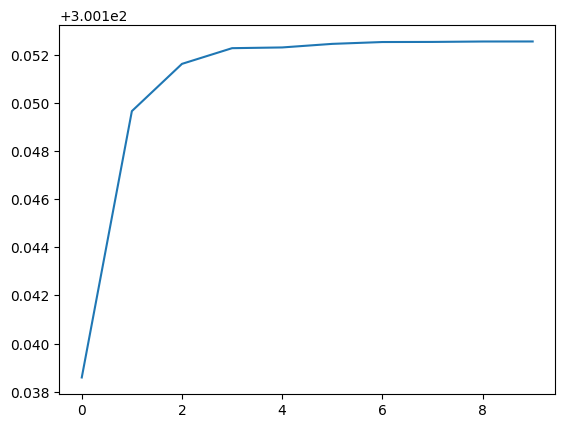

In [16]:
cost = []
U_matrices = []

for i in range(10):
    U_real = np.random.rand(N,N)
    #U_complex = np.random.rand(N,N)
    #U_init = np.zeros((N,N),dtype = 'complex_')
    U_init = U_real #+ 1j*U_complex
    #U_init = U_init / np.linalg.norm(U_init)
    U_init = U_init.flatten()
    #minimization
    minimum = minimize(cost_fun, U_init, method='BFGS', tol=1e-4)#, constraints=[nonlinear_constraint])
    cost.append(-1*minimum.fun)
    U_matrices.append(minimum.x)
 
print(cost) 
cost = np.array(cost)
U_matrices = np.array(U_matrices)    
sorted_indices = np.argsort(cost)
cost = cost[sorted_indices]
U_matrices = U_matrices[sorted_indices]
    
plt.plot(cost)
plt.show()

In [17]:
#U_matrices[-1] = U_matrices[-1]/np.linalg.norm(U_matrices[-1])
for i in range(len(U_matrices)):
    print(cost_fun(U_matrices[i]))


-300.1385870656719
-300.1496734562793
-300.1516405453337
-300.15229385270845
-300.15232434353703
-300.15247308347443
-300.1525495394416
-300.15255406172406
-300.1525714076261
-300.1525726144691


In [18]:
#cost function
def cost_fun_F(U_vector): 
    #reshape to matrix
    U = U_vector.reshape(N,N)
    U = U/ np.linalg.norm(U,2) 
    A_vect = return_permanents(U)
    A_tar_vect = A_target.flatten()
    #print("permanent matrix: ", A_vect)
    #F = np.abs(np.dot(A_tar_vect, A_vect))/((N/2)**2*(max(A_vect)))
    
    F = ((np.dot(A_tar_vect, A_vect))**2)/((N/2)**2*np.linalg.norm(A_vect)**2)
    #F = 1 - np.linalig.norm((A_tar_vect - A_vect))
    #print(F)
    S = A_vect[0]**2            #success probability
    
    return -1*(F )

In [19]:
'''cost = []
U_matrices_final = []

for i in range(50):
    #minimization
    U_init = U_matrices[-1]
    minimum = minimize(cost_fun_final, U_init, method='BFGS', tol=1e-4)#, constraints=[nonlinear_constraint])
    cost.append(-1*minimum.fun)
    U_matrices_final.append(minimum.x)
 
print(cost) 
cost = np.array(cost)
U_matrices_final = np.array(U_matrices)    
sorted_indices = np.argsort(cost)
cost = cost[sorted_indices]
U_matrices_final = U_matrices_final[sorted_indices]
    
plt.plot(cost)
plt.show()'''

"cost = []\nU_matrices_final = []\n\nfor i in range(50):\n    #minimization\n    U_init = U_matrices[-1]\n    minimum = minimize(cost_fun_final, U_init, method='BFGS', tol=1e-4)#, constraints=[nonlinear_constraint])\n    cost.append(-1*minimum.fun)\n    U_matrices_final.append(minimum.x)\n \nprint(cost) \ncost = np.array(cost)\nU_matrices_final = np.array(U_matrices)    \nsorted_indices = np.argsort(cost)\ncost = cost[sorted_indices]\nU_matrices_final = U_matrices_final[sorted_indices]\n    \nplt.plot(cost)\nplt.show()"

In [22]:
#cost function
def cost_fun_S(U_vector): 
    #reshape to matrix
    U = U_vector.reshape(N,N)
    U = U/ np.linalg.norm(U,2) 
    A_vect = return_permanents(U)
    A_tar_vect = A_target.flatten()
    #print("permanent matrix: ", A_vect)
    #F = np.abs(np.dot(A_tar_vect, A_vect))/((N/2)**2*(max(A_vect)))
    
    F = ((np.dot(A_tar_vect, A_vect))**2)/((N/2)**2*np.linalg.norm(A_vect)**2)
    #F = 1 - np.linalig.norm((A_tar_vect - A_vect))
    #print(F)
    S = sum(A_vect**2)/4            #success probability
    
    return -1*(S )

In [23]:
print(cost_fun_F(U_matrices[-1]))
print(cost_fun_S(U_matrices[-1]))
print(U_matrices[-1]/np.linalg.norm(U_matrices[-1],2))

-0.9999993608014835
-0.1523428450798996
[ 1.09449540e-01 -2.41727464e-01  4.23677632e-01  2.82138978e-03
 -4.53503541e-01  1.09356176e-01  1.79835765e-01 -3.52725526e-04
 -4.04181718e-04  2.59763376e-03 -1.69697852e-03  5.00059674e-01
  1.79793245e-01  4.23690174e-01  1.95453946e-01 -1.40943885e-03]
